In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
HC_data = pd.read_csv('C:/Users/matte/Downloads/Home Corners/HC_clean.csv')
HC_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,TGG,HTHG,HTAG,THGG,HS,AS,HST,AST,HF,AF,AC,HY,AY,HR,AR,AvgC_greater_than_2.5,AvgC_less_than_2.5,HC
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,4,0,1,1,6,25,1,10,16,11,6,2,1,0,0,1.34,3.29,0
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,8,3,3,6,20,9,8,6,9,14,7,1,2,0,0,1.62,2.31,8
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,3,0,2,2,24,17,5,8,9,9,2,0,1,0,0,1.65,2.26,4
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,5,2,1,3,11,13,7,6,13,10,5,1,2,0,0,1.68,2.19,4
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,5,2,0,2,19,4,9,1,5,12,0,1,1,0,0,1.64,2.26,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,4,1,1,2,7,20,5,11,6,14,10,1,1,0,0,1.55,2.45,3
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,2,1,0,1,13,13,5,11,15,17,3,3,3,0,0,1.35,3.14,7
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,3,0,3,4,13,4,3,8,13,9,4,0,2,1,1.50,2.55,4
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,7,2,2,4,12,18,8,11,3,7,4,0,2,0,0,1.32,3.34,5


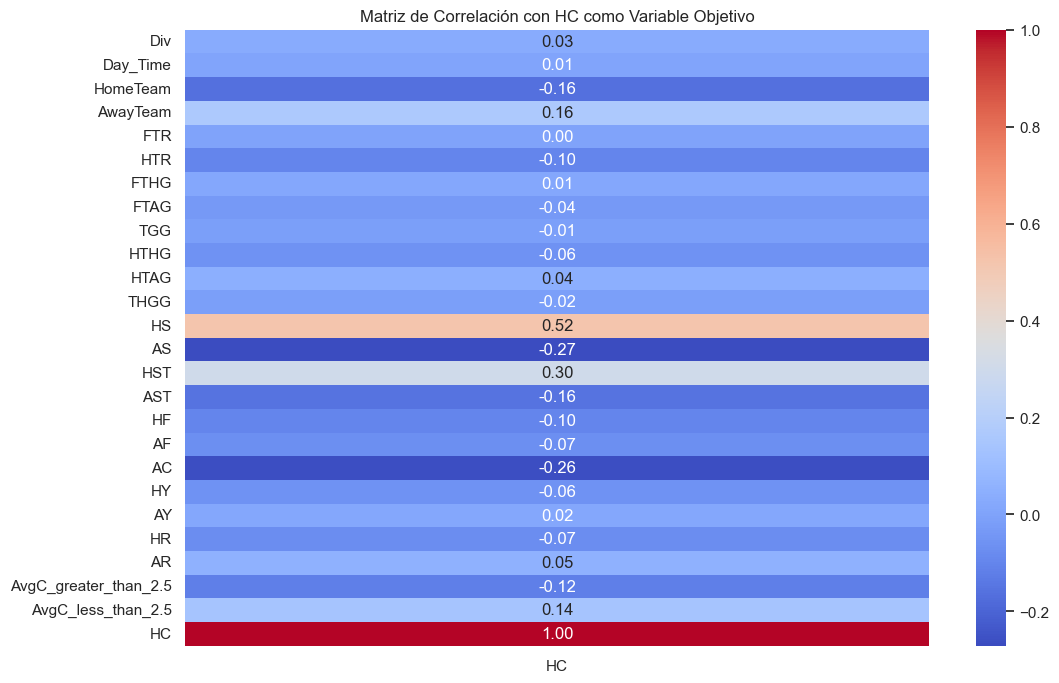

In [3]:
# Lista de variables objetivo
objective_variables = ['HC']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = HC_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['HC']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = HC_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = HC_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HC:
                  Feature        VIF
0                      HC   6.332470
1                     Div   3.399003
2                Day_Time   6.392247
3                HomeTeam   4.216310
4                AwayTeam   3.906049
5                     FTR  11.358905
6                     HTR  16.962277
7                    FTHG        inf
8                    FTAG        inf
9                     TGG        inf
10                   HTHG        inf
11                   HTAG        inf
12                   THGG        inf
13                     HS  17.750269
14                     AS  15.200605
15                    HST  11.179843
16                    AST   9.926705
17                     HF  13.024896
18                     AF  12.963623
19                     AC   5.572715
20                     HY   3.890636
21                     AY   4.237433
22                     HR   1.185694
23                     AR   1.191684
24  AvgC_greater_than_2.5  28.075621
25     AvgC_less_than_2.5

In [5]:
HC_data.columns

Index(['Div', 'Day_Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'FTHG', 'FTAG',
       'TGG', 'HTHG', 'HTAG', 'THGG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'AC', 'HY', 'AY', 'HR', 'AR', 'AvgC_greater_than_2.5',
       'AvgC_less_than_2.5', 'HC'],
      dtype='object')

In [6]:
# Eliminar las columnas especificadas
columns_to_drop = ['TGG', 'THGG', 'AvgC_greater_than_2.5', 'AvgC_less_than_2.5']
HC_data = HC_data.drop(columns=columns_to_drop, errors='ignore')
HC_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,AC,HY,AY,HR,AR,HC
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,0,1,6,25,1,10,16,11,6,2,1,0,0,0
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,3,3,20,9,8,6,9,14,7,1,2,0,0,8
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,0,2,24,17,5,8,9,9,2,0,1,0,0,4
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,2,1,11,13,7,6,13,10,5,1,2,0,0,4
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,2,0,19,4,9,1,5,12,0,1,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,1,1,7,20,5,11,6,14,10,1,1,0,0,3
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,1,0,13,13,5,11,15,17,3,3,3,0,0,7
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,0,4,13,4,3,8,13,9,4,0,2,1,4
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,2,2,12,18,8,11,3,7,4,0,2,0,0,5


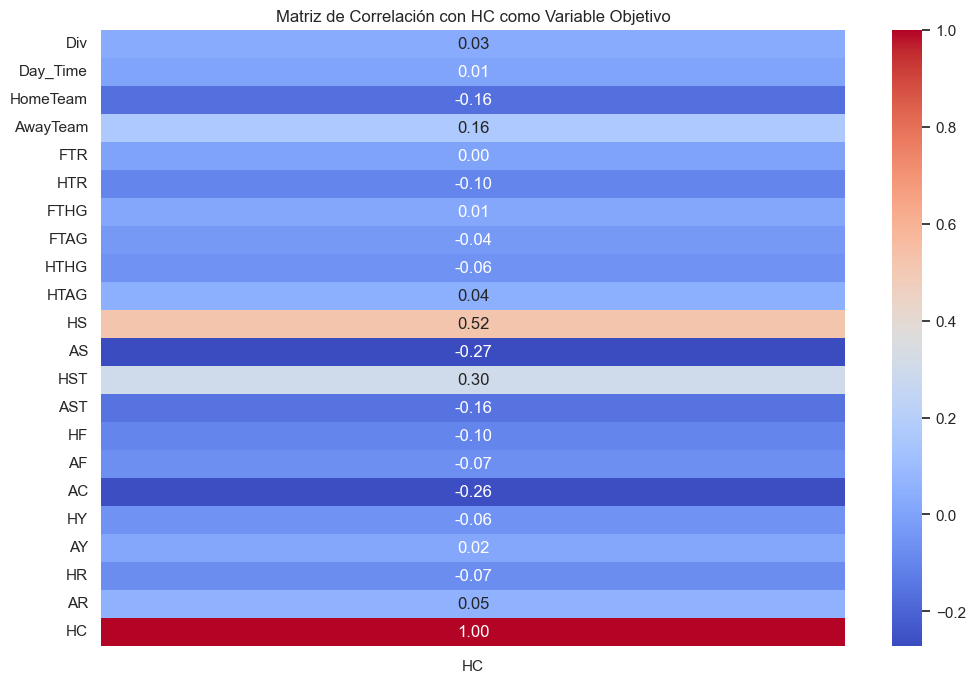

In [7]:
# Lista de variables objetivo
objective_variables = ['HC']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = HC_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [8]:
# Lista de variables objetivo
objective_variables = ['HC']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = HC_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = HC_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HC:
     Feature        VIF
0         HC   6.114774
1        Div   3.323050
2   Day_Time   5.972315
3   HomeTeam   3.819625
4   AwayTeam   3.846818
5        FTR  11.096126
6        HTR  15.812985
7       FTHG  10.077129
8       FTAG   8.674545
9       HTHG   7.112554
10      HTAG   6.325711
11        HS  16.046384
12        AS  14.496176
13       HST  11.026813
14       AST   9.864384
15        HF  11.381186
16        AF  11.380344
17        AC   5.471371
18        HY   3.883990
19        AY   4.233146
20        HR   1.184251
21        AR   1.191352


In [31]:
# Eliminar las columnas especificadas
columns_to_drop = ['Div', 'Day_Time', 'HTR', 'HST', 'AST', 'HY', 'AY', 'HR', 'AR']
HC_data = HC_data.drop(columns=columns_to_drop, errors='ignore')
HC_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HS,AS,HF,AF,AC,HC
0,11.0,0.0,0.0,0,4,0,1,6,25,16,11,6,0
1,13.0,3.0,1.0,4,4,3,3,20,9,9,14,7,8
2,9.0,7.0,0.0,1,2,0,2,24,17,9,9,2,4
3,4.0,2.0,2.0,3,2,2,1,11,13,13,10,5,4
4,10.0,15.0,2.0,5,0,2,0,19,4,5,12,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,7,20,6,14,10,3
8951,9.4,15.4,1.0,1,1,1,0,13,13,15,17,3,7
8952,16.4,10.4,2.0,3,0,3,0,4,13,8,13,9,4
8953,21.4,27.4,0.0,3,4,2,2,12,18,3,7,4,5


In [10]:
# Lista de variables objetivo
objective_variables = ['HC']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = HC_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = HC_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para HC:
     Feature        VIF
0         HC   6.017112
1   HomeTeam   3.722353
2   AwayTeam   3.740787
3        FTR   9.443069
4       FTHG   8.498917
5       FTAG   7.267742
6       HTHG   3.342488
7       HTAG   3.064926
8         HS  10.665442
9         AS   9.369493
10        HF   9.193546
11        AF   9.222320
12        AC   5.359997


In [11]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = HC_data.drop(columns=['HC'])  # Características excluyendo la variable objetivo
y = HC_data['HC']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 6.226250753768844
R^2 Score: 0.2986925114196972


In [14]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

# Inicializar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de divisiones para la validación cruzada
                           scoring='r2',  # Métrica de evaluación
                           verbose=1,
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Entrenar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el modelo ajustado
y_pred_grid = best_rf_model.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R^2 Score después de ajuste de hiperparámetros: {r2_grid}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 300}
R^2 Score después de ajuste de hiperparámetros: 0.3158374426333753


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=15)

# Entrenar el modelo con los datos limpios TGG_data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=300)

In [16]:
importances = rf.feature_importances_

In [17]:
feature_names = list(X_train.columns)  # Obtener nombres de características si X_train es un DataFrame

# Crear un DataFrame de importancias de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

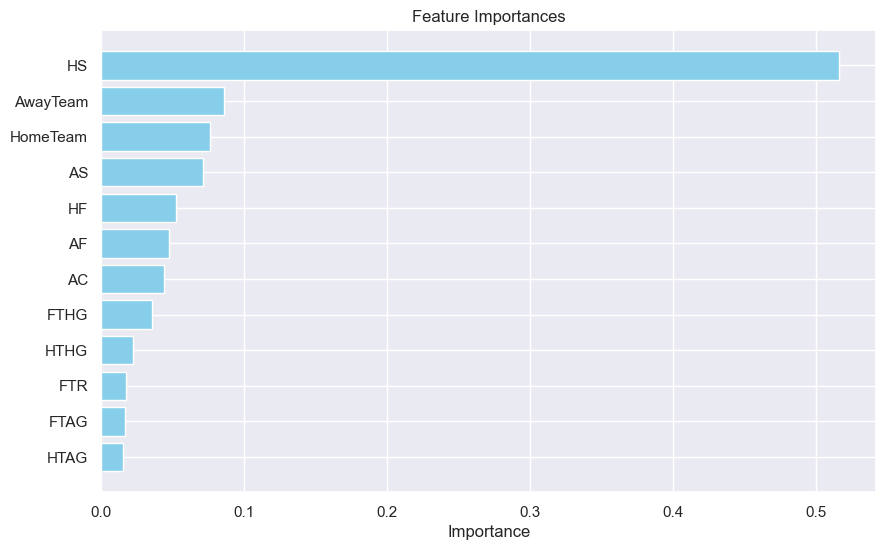

In [18]:
# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [19]:
# Definir la variable objetivo específica
target_variable = 'HC'

# Seleccionar variables numéricas excluyendo la variable objetivo
X = HC_data.drop(columns=[target_variable])
y = HC_data[target_variable]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar importancia de las variables para 'TGG' en el modelo de Random Forest
print(f"\nImportancia de las variables para '{target_variable}' en el modelo de Random Forest:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")


Importancia de las variables para 'HC' en el modelo de Random Forest:
1. HS: 0.3052824304515541
2. AwayTeam: 0.1360552378859424
3. HomeTeam: 0.13097525413586397
4. AS: 0.09229196704075936
5. AC: 0.06921977199964952
6. AY: 0.05213768834759466
7. HY: 0.0489917039974459
8. FTHG: 0.04172648266698259
9. FTAG: 0.031887427847164834
10. HTHG: 0.02682726092798066
11. HTAG: 0.02433427775110396
12. FTR: 0.02091446724802837
13. AR: 0.010489774879777909
14. HR: 0.008866254820151815


In [33]:
HC_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HS,AS,HF,AF,AC,HC
0,11.0,0.0,0.0,0,4,0,1,6,25,16,11,6,0
1,13.0,3.0,1.0,4,4,3,3,20,9,9,14,7,8
2,9.0,7.0,0.0,1,2,0,2,24,17,9,9,2,4
3,4.0,2.0,2.0,3,2,2,1,11,13,13,10,5,4
4,10.0,15.0,2.0,5,0,2,0,19,4,5,12,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,7,20,6,14,10,3
8951,9.4,15.4,1.0,1,1,1,0,13,13,15,17,3,7
8952,16.4,10.4,2.0,3,0,3,0,4,13,8,13,9,4
8953,21.4,27.4,0.0,3,4,2,2,12,18,3,7,4,5


In [38]:
# Ajusta new_data para que coincida con las columnas de entrenamiento
new_data7 = pd.DataFrame({
    'HomeTeam': [1.10],  
    'AwayTeam': [0.10],
    'FTR': [2.0],
    'FTHG': [5],
    'FTAG': [1],
    'HTHG': [2],
    'HTAG': [0],  
    'HS': [13],
    'AS': [15],
    'HF': [17],
    'AF': [14],
    'AC': [2]
})
# Hacer la predicción utilizando el modelo entrenado
predicted_HC = rf_model.predict(new_data7)
print(f"Predicción de HC para el nuevo partido: {predicted_HC}")

Predicción de HC para el nuevo partido: [5.01]
